In [11]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

rolling_period = 20

def read_system_json(algo, env, scenario, env_n, seed):
    seed = f"seed_{seed}"
    path = f"../results/json/{algo}/{env}/{scenario}/envs_{env_n}/{seed}/"
    try:
        with open(path + "metrics.json", "r") as f:
            data = json.load(f)
    except:
        print(f"Failed to read {path}")
        return None

    data = data[env][scenario][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    df[f"rolling_{rolling_period}"] = df["mean_episode_returns"].rolling(rolling_period).mean()
    
    return df

Failed to read ../results/json/ff_mappo/HeuristicEnemySMAX/2s3z/envs_4/seed_42/


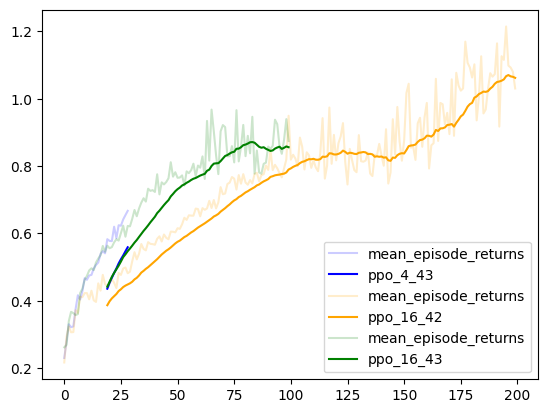

In [12]:
env = "HeuristicEnemySMAX"
scenario = "2s3z"

env_ns = [4, 16]
seeds = [42, 43]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ff_mappo", env, scenario, env_n, seed)

        if df is None: continue
        
        df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax, color=colors[i])

        i += 1
